In [71]:
#Wrangling
import numpy as np
import pandas as pd
import janitor
pd.set_option("display.max_colwidth", 200)

#graphing
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
alt.data_transformers.disable_max_rows()


#Machine learning
#sklearn
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler, OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn import linear_model

#tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import utils
from tensorflow.keras.applications.inception_v3 import InceptionV3

#other ml
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#other 
from datetime import date
import time
import pickle
from joblib import dump, load
import eli5
import scikitplot as skplt

#helper functations
import support_functions as support

In [2]:
#ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

### LOAD Data

In [3]:
#Data: https://www.kaggle.com/uciml/adult-census-income
#1994 Census Bureau Databases
df = pd.read_csv("../data/adult.csv")

In [4]:
#clean names
df = df.clean_names()

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.head()

age workclass  fnlwgt     education  education_num marital_status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital_gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital_loss  hours_per_week native_country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [9]:
df.tail()

age workclass  fnlwgt     education  education_num      marital_status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital_gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital_loss  hours_per_week native_country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

### Cleaning values 
- Syntax Errors
    - White space `.str.strip()`
    - case senstive `.str.lower()`
    - typos
- replacing blank or other values with nan `df[df == '?'] = np.nan`
- maybe drop nans 

Cleaning Checklist:
   - workclass
       - drop workclass b/c too many privates
   - educations 
       - group grades preschool to 12 as did not finish hs
   - education_num
       - keep education_num consider droping it
   - marital_status
       - married-AF-spouse is for armed forces regroup with married-civ-spouse
   - occupatations
       - change null to no_occupation 
       - group armed-forces with other
   - race
       - consider droping race dominated by white
   - capital_gain
       - few outliars
   - native_country
       - group other null into non-united-states
       - group every other country into non-united-states
   - Income
       - about a 3/4 less than 50k and 1/4 greater than 50k
       - Consider unbalance techniques 

In [10]:
#replace ? with nans
df[df == '?'] = np.nan

In [11]:
#drop working class
df = df.drop(['workclass'], axis=1)

In [12]:
#group education levels, marital_status and occupation
df = df.replace({'education':{'Preschool':'DNF-HS',
                              '1st-4th': 'DNF-HS',
                              '5th-6th': 'DNF-HS',
                              '7th-8th': 'DNF-HS',
                              '9th': 'DNF-HS',
                              '10th': 'DNF-HS',
                              '11th': 'DNF-HS',
                              '12th': 'DNF-HS'},
                 'marital_status':{'Married-AF-spouse':'Married-civ-spouse'},
                 'occupation':{'Armed-Forces':'Other-service'},
                 'race':{'Amer-Indian-Eskimo':'Other'}})

#fill NaNs
df = df.fillna({'occupation':'Other-service',
                'native_country':'International'})

#make native_country domestic or international 
df['native_country'] = df['native_country'].apply(lambda x: 'Domestic' if x == 'United-States' else 'International')

#change income into target
df['target'] = df['income'].apply(lambda x: 1 if x == ">50K" else 0)

In [13]:
#assigns X and y
X = df.drop(['income', 'target'], axis=1)
y = df['target']

### Split Data

In [14]:
X_train, y_train, X_valid, y_valid, X_trainvalid, y_trainvalid, X_test, y_test = support.split_data(X,y)

Number of training examples: 19536
Number of validation examples: 6512
Number of test examples: 6513


### Review Data

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [16]:
X.shape

(32561, 13)

In [17]:
X_train.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  19536.000000  1.953600e+04   19536.000000  19536.000000  19536.000000   
mean      38.442414  1.899464e+05      10.077703   1074.497133     87.015612   
std       13.628669  1.051693e+05       2.573318   7435.154917    402.138382   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.180010e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.785305e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.372398e+05      12.000000      0.000000      0.000000   
max       90.000000  1.366120e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    19536.000000  
mean        40.460893  
std         12.407339  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [18]:
X_train.head()

age  fnlwgt     education  education_num         marital_status  \
8128    46  111979        DNF-HS              4     Married-civ-spouse   
18604   34  418020     Doctorate             16     Married-civ-spouse   
6066    47   30575  Some-college             10     Married-civ-spouse   
16719   44  203897     Bachelors             13  Married-spouse-absent   
25495   55  111130    Assoc-acdm             12               Divorced   

           occupation   relationship                race     sex  \
8128     Craft-repair        Husband               White    Male   
18604  Prof-specialty        Husband               White    Male   
6066   Prof-specialty        Husband               White    Male   
16719    Adm-clerical  Not-in-family               White  Female   
25495    Adm-clerical      Own-child  Asian-Pac-Islander    Male   

       capital_gain  capital_loss  hours_per_week native_country  
8128              0             0              47       Domestic  
18604             0             0              50       Domestic  
6066              0             0              50       Domestic  
16719             0             0              40  International  
25495             0             0              40       Domestic

In [19]:
X_train.tail()

age  fnlwgt     education  education_num      marital_status  \
21351   53  108815       HS-grad              9  Married-civ-spouse   
5767    43   57322    Assoc-acdm             12            Divorced   
17477   23  306601     Bachelors             13       Never-married   
7849    63  154526  Some-college             10             Widowed   
10569   33   31573       HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital_gain  \
21351       Craft-repair        Husband  White    Male             0   
5767        Craft-repair  Not-in-family  White    Male             0   
17477       Craft-repair  Not-in-family  Other    Male             0   
7849       Other-service  Not-in-family  White  Female             0   
10569  Machine-op-inspct        Husband  White    Male             0   

       capital_loss  hours_per_week native_country  
21351             0              60       Domestic  
5767              0              40       Domestic  
17477             0              40  International  
7849              0              40       Domestic  
10569             0              40       Domestic

In [20]:
X_train.columns

Index(['age', 'fnlwgt', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [21]:
X_train.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  19536.000000  1.953600e+04   19536.000000  19536.000000  19536.000000   
mean      38.442414  1.899464e+05      10.077703   1074.497133     87.015612   
std       13.628669  1.051693e+05       2.573318   7435.154917    402.138382   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.180010e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.785305e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.372398e+05      12.000000      0.000000      0.000000   
max       90.000000  1.366120e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    19536.000000  
mean        40.460893  
std         12.407339  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [22]:
#split numerical and categorical features
numeric_features = ['age', 'fnlwgt' , 'education_num', 'capital_gain',
                    'capital_loss', 'hours_per_week']


categorical_features = ['education', 'marital_status', 
                        'occupation', 'relationship', 'race', 'sex',
                        'native_country']

In [23]:
#review categorical features
feat_val_dict = {}
for feat in categorical_features:
    print('Feature: %s' %(feat))
    print('------------')
    print(df[feat].value_counts())
    print('\n\n')

Feature: education
------------
HS-grad         10501
Some-college     7291
Bachelors        5355
DNF-HS           4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64



Feature: marital_status
------------
Married-civ-spouse       14999
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Name: marital_status, dtype: int64



Feature: occupation
------------
Other-service        5147
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Name: occupation, dtype: int64



Feature: relationship
------------
Husband           13193
Not-in-famil

## Visualization

In [114]:
df_visulization = X_trainvalid
df_visulization['income'] = y_trainvalid

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
X.columns

Index(['age', 'fnlwgt', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [127]:
#income
alt.Chart(df_visulization).mark_bar().encode(
    alt.X('income:N'),
    y='count():Q'
    
)

alt.Chart(...)

- about 20% of the data set is making over 50K a year

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


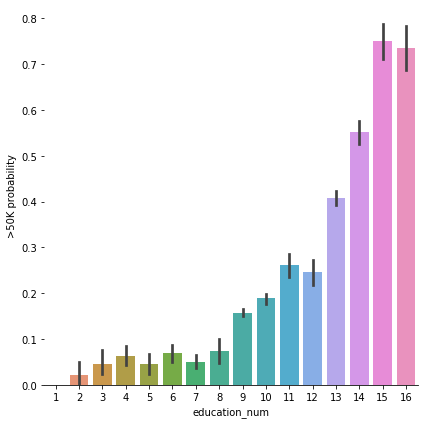

In [147]:
g = sns.factorplot(x="education_num",
                   y="income",
                   data=df_visulization,
                   kind="bar",
                   size = 6)
g.despine(left=True)
g = g.set_ylabels(">50K probability")

- higher the education_number the more likely they are to make over 50K

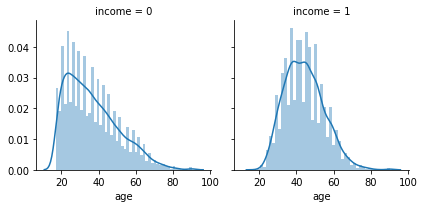

In [150]:
g = sns.FacetGrid(df_visulization, col='income')
g = g.map(sns.distplot, "age")

- Age increase your change to earn a higher income

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


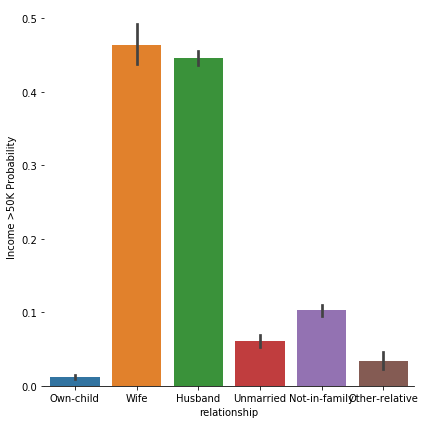

In [152]:
g = sns.factorplot(x="relationship",
                   y="income",
                   data=df_visulization,
                   kind="bar", 
                   size = 6 )
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


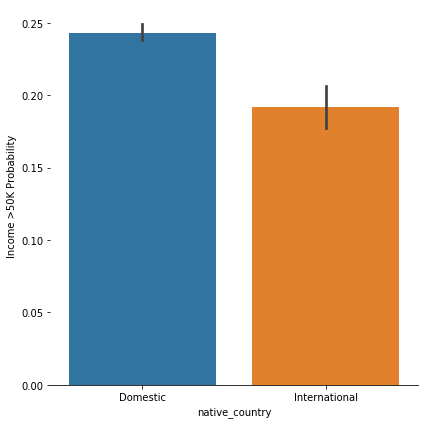

In [153]:
g = sns.factorplot(x="native_country",
                   y="income",
                   data=df_visulization,
                   kind="bar", 
                   size = 6 )
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

### Clean data Checklist

- Null Values
- Erroneous Values 
- Standardization or normalization

In [27]:
numeric_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())
                                    ])


categorical_transformer = Pipeline(steps=[
                                          ('imputer', SimpleImputer(strategy='constant', 
                                                                    fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                         ])

preprocessor = ColumnTransformer(
                                 transformers=[
                                    ('num', numeric_transformer, numeric_features),
                                    ('cat', categorical_transformer, categorical_features)
                                ])


In [28]:
#results dictionary 
results_dict = {}
y_test_pred = {}

### Models 

In [29]:
models = {
          'dummy' : DummyClassifier(),
          'decision tree': DecisionTreeClassifier(),
          'kNN': KNeighborsClassifier(),
          'logistic regression': LogisticRegression(),
          'RBF SVM' : SVC(), 
          'random forest' : RandomForestClassifier(), 
          'xgboost' : XGBClassifier(),
          'lgbm': LGBMClassifier()
         }

In [30]:
for model_name, model in models.items():
    t = time.time()
    #print(model_name, ":")    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train);
    tr_err, valid_err = support.get_scores(clf, X_train, y_train, 
                                   X_valid, y_valid, show = False)
    elapsed_time = time.time() - t
    results_dict[model_name] = [round(tr_err,3), round(valid_err,3), round(elapsed_time,4)]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
results_df = pd.DataFrame(results_dict).T
results_df.columns = ["Train error", "Validation error", "Time in seconds"]
results_df

Train error  Validation error  Time in seconds
dummy                      0.364             0.371           0.1081
decision tree              0.000             0.189           0.6354
kNN                        0.121             0.170          21.4321
logistic regression        0.148             0.153           0.2459
RBF SVM                    0.135             0.149          15.3118
random forest              0.000             0.151          10.3553
xgboost                    0.090             0.139           0.8217
lgbm                       0.109             0.136           0.2899

# Focus on 1 model

In [32]:
#try logistic regression
t = time.time()
weights = np.linspace(0.05, 0.95, 10)
param_grid = {'C': 10.0**np.arange(-2,3),
              'class_weight': [{0: x, 1: 1.0-x} for x in weights]}

model = GridSearchCV(LogisticRegression(solver='liblinear',
                                        penalty='l1'),
                                        param_grid=param_grid,
                                        cv=10,
                                        scoring='f1')

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train);
elapsed_time = time.time() - t
print(f"Elapsed time passed: {elapsed_time}")

Elapsed time passed: 214.15455293655396


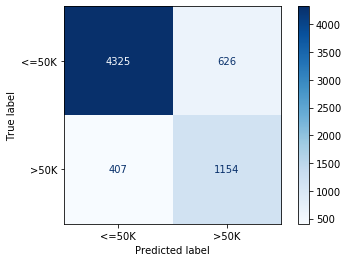

In [33]:
plot_confusion_matrix(clf, X_valid, y_valid,
                      display_labels = ['<=50K', '>50K'],
                      cmap=plt.cm.Blues, 
                      values_format = 'd')

In [34]:
support.get_scores(clf, X_train, y_train, X_valid, y_valid)

Training error:   0.32
Validation error: 0.31




(0.31574724172517554, 0.3091888656090992)

In [35]:
model_test = LogisticRegression(max_iter=100000)

clf_test = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model_test)])

clf_test.fit(X_train, y_train);
support.get_scores(clf_test, X_train, y_train, X_valid, y_valid)

Training error:   0.15
Validation error: 0.15




(0.1483415233415234, 0.15279484029484025)

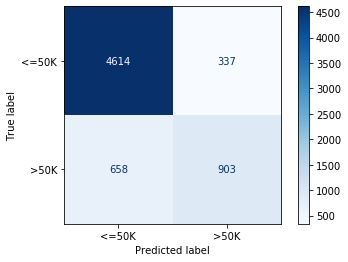

In [36]:
plot_confusion_matrix(clf_test, X_valid, y_valid,
                      display_labels = ['<=50K', '>50K'],
                      cmap=plt.cm.Blues, 
                      values_format = 'd')

L1 penality is not working very well for the this problem 

In [51]:
[{0: x, 1: 1.0-x} for x in l1_ratio]

[{0: 0.1, 1: 0.9},
 {0: 0.18888888888888888, 1: 0.8111111111111111},
 {0: 0.2777777777777778, 1: 0.7222222222222222},
 {0: 0.3666666666666667, 1: 0.6333333333333333},
 {0: 0.4555555555555556, 1: 0.5444444444444444},
 {0: 0.5444444444444445, 1: 0.4555555555555555},
 {0: 0.6333333333333333, 1: 0.3666666666666667},
 {0: 0.7222222222222222, 1: 0.2777777777777778},
 {0: 0.8111111111111111, 1: 0.18888888888888888},
 {0: 0.9, 1: 0.09999999999999998}]

In [54]:
t = time.time()
weights = np.linspace(0.05, 0.95, 5)
l1_ratio = np.linspace(.1, .9, 10)
param_grid = {'C': 10.0**np.arange(-2,3),
              'class_weight': [{0: x, 1: 1.0-x} for x in weights],
              'l1_ratio': l1_ratio}

model = GridSearchCV(LogisticRegression(solver='saga',
                                        penalty='elasticnet',
                                        max_iter=100000),
                                        param_grid=param_grid,
                                        cv=5,
                                        )

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

clf.fit(X_train, y_train);
elapsed_time = time.time() - t
print(f"Elapsed time passed: {elapsed_time}")



model_test = LogisticRegression(max_iter=100000,
                                solver='saga',
                                penalty='elasticnet',
                                l1_ratio=.25,
                                n_jobs=-1,
                                warm_start=True)

clf_test = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model_test)])

clf_test.fit(X_train, y_train);
support.get_scores(clf_test, X_train, y_train, X_valid, y_valid)

Elapsed time passed: 10317.809992074966
Training error:   0.15
Validation error: 0.15




(0.1482903357903358, 0.15248771498771496)

In [72]:
#assign final model
final_model = clf_test
dump(final_model, '../model/adult.joblib')

['../model/adult.joblib']

In [65]:
support.get_scores(final_model, X_train, y_train, X_valid, y_valid)

Training error:   0.15
Validation error: 0.15




(0.1482903357903358, 0.15248771498771496)

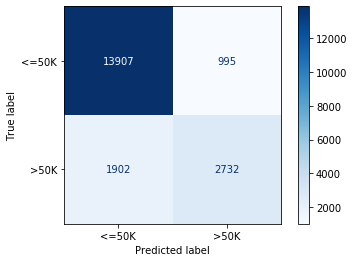

In [68]:
#train confustion matrix 

plot_confusion_matrix(final_model, X_train, y_train,
                      display_labels = ['<=50K', '>50K'],
                      cmap=plt.cm.Blues, 
                      values_format = 'd')

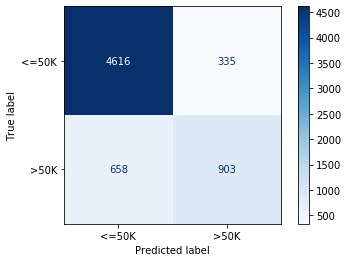

In [67]:
#valid confustion matrix
plot_confusion_matrix(final_model, X_valid, y_valid,
                      display_labels = ['<=50K', '>50K'],
                      cmap=plt.cm.Blues, 
                      values_format = 'd')

## Feature importance

In [106]:
onehot_columns = list(final_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(input_features=categorical_features))
numeric_features_list = list(numeric_features)
numeric_features_list.extend(onehot_columns)

In [108]:
eli5.explain_weights(final_model.named_steps['classifier'], top=50,
                    feature_names=numeric_features_list)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=0.25, max_iter=100000,\n                   multi_class='auto', n_jobs=None, penalty='elasticnet',\n                   random_state=None, solver='saga', tol=0.0001, verbose=0,\n                   warm_start=False)", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='capital_gain', weight=2.2789520922825774, std=None, value=None), FeatureWeight(feature='marital_status_Married-civ-spouse', weight=1.2723286024262348, std=None, value=None), FeatureWeight(feature='relationship_Wife', weight=1.2254023237950356, std=None, value=None), FeatureWeight(feature='occupation_Exec-managerial', weight=0.6894817433322837, std=None, value=None), FeatureWeight(feature='occupation_Tech-support', weight=0.5673015490806423, std=None, value=None), FeatureWeight(feature='education_num', weight=0.5638816394810167, std=None, value=None), FeatureWeight(feature='education_Doctorate', weight=0.43280278047392695, std=None, value=None), FeatureWeight(feature='occupation_Prof-specialty', weight=0.350170889201405, std=None, value=None), FeatureWeight(feature='occupation_Protective-serv', weight=0.33991143500983123, std=None, value=None), FeatureWeight(feature='age', weight=0.33951903965203306, std=None, value=None), FeatureWeight(feature='hours_per_week', weight=0.3372866027474793, std=None, value=None), FeatureWeight(feature='capital_loss', weight=0.27299703219984767, std=None, value=None), FeatureWeight(feature='education_Prof-school', weight=0.19214541975156363, std=None, value=None), FeatureWeight(feature='occupation_Sales', weight=0.16196395363862626, std=None, value=None), FeatureWeight(feature='fnlwgt', weight=0.06983385057559487, std=None, value=None), FeatureWeight(feature='education_Masters', weight=0.061603636593862865, std=None, value=None), FeatureWeight(feature='occupation_Craft-repair', weight=0.050337085924356276, std=None, value=None), FeatureWeight(feature='occupation_Adm-clerical', weight=0.02685551536283004, std=None, value=None)], neg=[FeatureWeight(feature='occupation_Farming-fishing', weight=-1.405249890670114, std=None, value=None), FeatureWeight(feature='sex_Female', weight=-1.3332168744809187, std=None, value=None), FeatureWeight(feature='relationship_Own-child', weight=-1.2390520828291496, std=None, value=None), FeatureWeight(feature='occupation_Priv-house-serv', weight=-1.1547447453457342, std=None, value=None), FeatureWeight(feature='relationship_Other-relative', weight=-1.1132194822723445, std=None, value=None), FeatureWeight(feature='marital_status_Never-married', weight=-0.9860686662280784, std=None, value=None), FeatureWeight(feature='native_country_International', weight=-0.9751063679424172, std=None, value=None), FeatureWeight(feature='occupation_Handlers-cleaners', weight=-0.8516406732577155, std=None, value=None), FeatureWeight(feature='occupation_Other-service', weight=-0.764507883980348, std=None, value=None), FeatureWeight(feature='native_country_Domestic', weight=-0.7205623943530135, std=None, value=None), FeatureWeight(feature='marital_status_Separated', weight=-0.6367248559380537, std=None, value=None), FeatureWeight(feature='education_DNF-HS', weight=-0.5959905392389335, std=None, value=None), FeatureWeight(feature='race_Other', weight=-0.46362568963681017, std=None, valu

## Final Test 

In [109]:
support.get_scores(final_model, X_train, y_train, X_test, y_test)

Training error:   0.15
Validation error: 0.15




(0.1482903357903358, 0.15185014586212187)

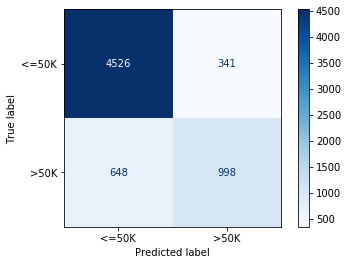

In [110]:
plot_confusion_matrix(final_model, X_test, y_test,
                      display_labels = ['<=50K', '>50K'],
                      cmap=plt.cm.Blues, 
                      values_format = 'd')

In [158]:
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)

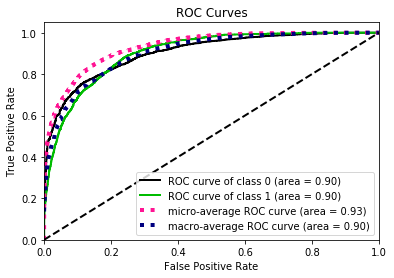

In [166]:

skplt.metrics.plot_roc_curve(y_test, y_pred_prob)
plt.show()

## Conclusion 


- Model is 85% accurate or has an error rate of 15% and is not overfitting/underfitting to the data

- Our model prefers to predict that people will not make over 50k when they do make over 50k therefore it has a higher false negative rate. 

- Model confirms that age and education are important to an individual’s chance of earning over 50k a year in 1994.

- Marriage seemed to be an important factor with earning over 50k. However, this may be due to people getting married later in life and the model is using marriage status as a proxy for age. This makes sense when according to the U.S. Census Bureau the mean married age for men was 26.7 and our dataset was skewed towards men. 

- Additionally, the model is properly prioritizing capital gains and hours worked per week as factors that would lead to a higher chance of earning above 50K. Which makes sense because we would expect these factors to have a direct impact on income. 